In [0]:
#q7

In [1]:
%matplotlib inline
import igraph # install using wheel (.whl) from https://www.lfd.uci.edu/~gohlke/pythonlibs/#python-igraph
import json # native
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv')
# Use only December data
travel_times = df[df['month'] == 12]
travel_times = travel_times[['sourceid', 'dstid', 'mean_travel_time']]
print(travel_times)
g = igraph.Graph.TupleList(travel_times.itertuples(index=False), directed=False, weights=True)
#                            vertex_name_attr='name')
#                             vertex_name_attr={'source': travel_times[['sourceid']], 'dest': travel_times[['dstid']]})
# g_vertices = list(igraph.VertexSeq(g))
# for i in range(3):
#     print(g_vertices[i])
# g_edges = list(igraph.EdgeSeq(g))
# for i in range(3):
#     print(g_edges[i].source)
# g.attributes()
# g.es[0].source
# for edge in g.es:
#       source_vertex_id = edge.source
#       print(g_vertices[source_vertex_id]['name'])
#       target_vertex_id = edge.target
#       source_vertex = g.vs[source_vertex_id]
#       target_vertex = g.vs[target_vertex_id]
#       # using get_eid() you can do the opposite:
#       same_edge_id = g.get_eid(source_vertex_id, target_vertex_id)
#       same_edge = g.es[same_edge_id]
#       # by .index you get the id from the Vertex or Edge object:
#       source_vertex.index == source_vertex_id
#       # True
#       edge.index == same_edge_id
#       # True
g.es

FileNotFoundError: File b'san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv' does not exist

In [0]:
travel_times.head()
print(np.unique(travel_times['sourceid']).shape)

(1867,)


In [0]:
node_dict = {}
with open("san_francisco_censustracts.json", encoding='utf-8') as jsondata:
    d = json.load(jsondata)
    for feature in d["features"]:
#         print(feature)
        coor = feature["geometry"]["coordinates"][0][0]
        addr = feature["properties"]["DISPLAY_NAME"]
        c1 = []
        c2 = []
        for d in coor:
            c1.append(d[0])
            c2.append(d[1])
#         print(int(feature["properties"]["MOVEMENT_ID"]))
#         nodes.append([feature["properties"]["MOVEMENT_ID"], addr, np.mean(c1), np.mean(c2)])
        node_dict[int(feature["properties"]["MOVEMENT_ID"])] = [addr, np.mean(c1), np.mean(c2)]
    
        if feature["properties"]["DISPLAY_NAME"] == "100 Campus Drive, Stanford":
            Stanford_id = feature["properties"]["MOVEMENT_ID"]
        if feature["properties"]["DISPLAY_NAME"] == "700 Meder Street, Santa Cruz":
            UCSC_id = feature["properties"]["MOVEMENT_ID"]
# points = np.array(list(node_dict.values()))
# print(points)
# print(nodes)
# print(g.vs[0])
# print(g.vs['name'])
# print([node_dict[k][0] for k in node_dict])
# print(node_dict[73][-2:])
# print([node_dict[k][0] for k in g.vs['name']])
g.vs['display_name'] = [node_dict[k][0] for k in g.vs['name']]
g.vs['location'] = [node_dict[k][-2:] for k in g.vs['name']]
# print(len(g.vs['display_name']))
# print(len(g.vs['location']))
# print(len(g.vs['name']))
print(len(g.es))
g_sim = g.simplify(multiple=True, combine_edges='mean')
print(len(g_sim.es))
gcc = g_sim.components().giant()
print(len(gcc.es))
print(len(g.vs))


555265
320926
320916
1905


In [0]:
#q7

In [0]:
g_mst = gcc.spanning_tree(weights=gcc.es['weight'])
for edge in g_mst.es[:5]:
    source = edge.source
    dest = edge.target
    print('Start: ', g_mst.vs[source]['display_name'])
    print('Dest : ', g_mst.vs[dest]['display_name'])
    print('Mean travel time: ', edge['weight'])
    print('-----------------------------------------------------\n')

Start:  100 Monte Verde Drive, Vacaville
Dest :  Unnamed Road, Vacaville
Mean travel time:  187.38
-----------------------------------------------------

Start:  100 Monte Verde Drive, Vacaville
Dest :  7600 Pleasants Valley Road, Vacaville
Mean travel time:  243.53
-----------------------------------------------------

Start:  100 Monte Verde Drive, Vacaville
Dest :  200 Madrone Street, Vacaville
Mean travel time:  210.185
-----------------------------------------------------

Start:  2100 Fieldcrest Avenue, Fairfield
Dest :  4900 Couples Circle, Fairfield
Mean travel time:  156.095
-----------------------------------------------------

Start:  2100 Fieldcrest Avenue, Fairfield
Dest :  7600 Pleasants Valley Road, Vacaville
Mean travel time:  129.26
-----------------------------------------------------



In [0]:
#q11

In [0]:
%matplotlib inline
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
# points = np.array([node_dict[k][-2:] for k in node_dict])
# print([node_dict[k][-2:] for k in node_dict])
points = np.array(gcc.vs['location'])
# print(points)
# tri = Delaunay(points)
# print(tri)
# plt.figure(figsize=(30,20))
# plt.triplot(points[:,0], points[:,1], tri.simplices, lw=0.5)
# plt.plot(points[:,0], points[:,1], 'ro', ms=3)
# plt.axis('scaled')
# plt.show()

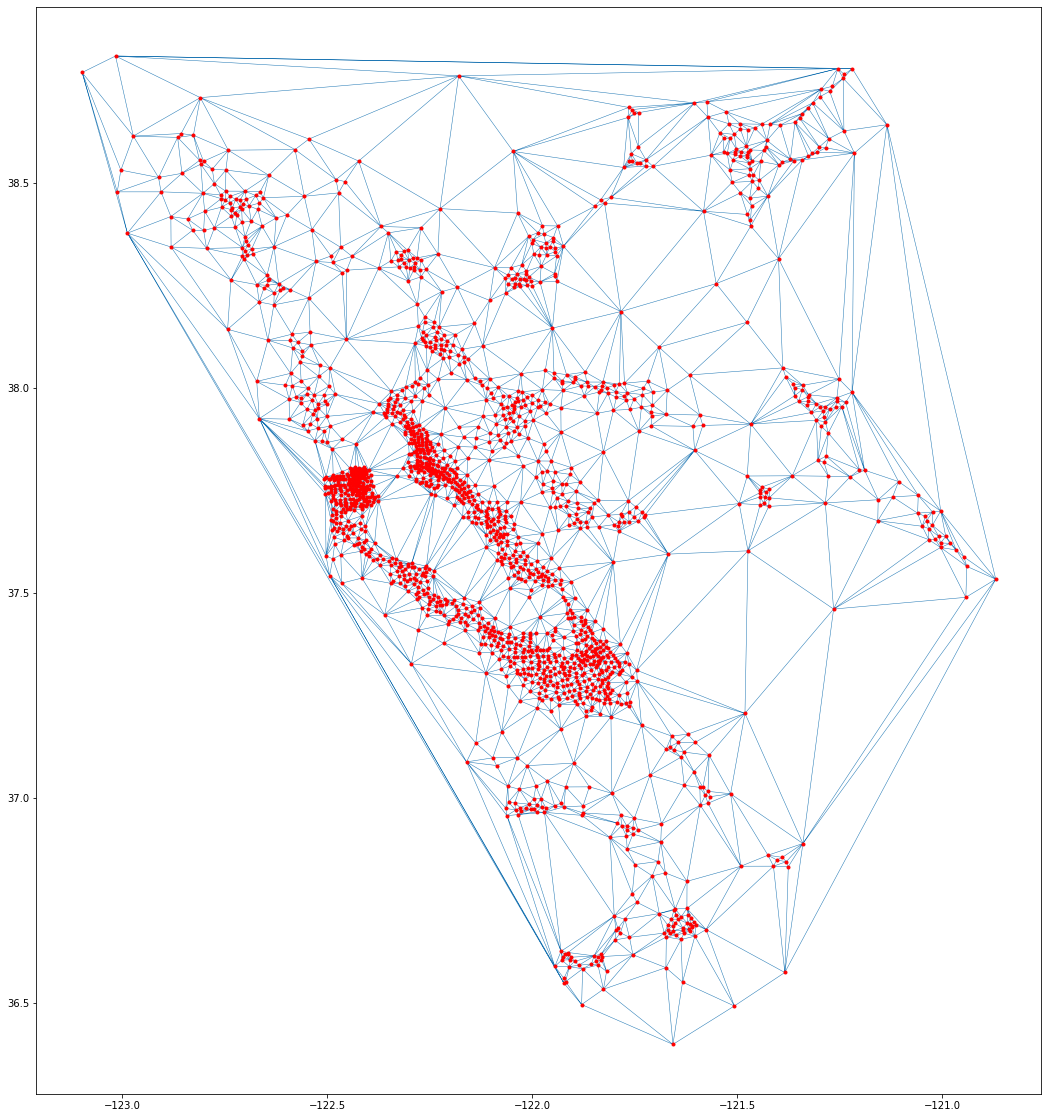

(5680, 2)

In [0]:
import matplotlib.tri as mpltri
plt.figure(figsize=(30,20))
triangulation = mpltri.Triangulation(points[:,0], points[:,1])
plt.triplot(triangulation, lw=0.5)
plt.plot(points[:,0], points[:,1], 'ro', ms=3)
plt.axis('scaled')
plt.show()
triangulation.edges.shape

In [0]:
#q12

In [0]:
# for gcc_edge in gcc.es:
#     print(gcc_edge)
# print(np.amax(gcc.vs))
# print(np.amax(np.unique(triangulation.edges)))
# print(gcc.es[0].source)
gcc_edge = []
# gcc_edge_weight = []
for e in gcc.es:
    gcc_edge.append([e.source, e.target, e['weight']])
#     gcc_edge_weight.append(e['weight'])
gcc_edge = np.array(gcc_edge)
print(gcc_edge[0:5])
# print(gcc_edge_weight[0:5])

[[0.00000e+00 1.00000e+00 3.06940e+02]
 [0.00000e+00 2.00000e+00 3.33244e+03]
 [0.00000e+00 1.00000e+01 2.80722e+03]
 [0.00000e+00 1.80000e+01 4.91953e+03]
 [0.00000e+00 2.40000e+01 3.67799e+03]]


In [0]:
tri_e = (triangulation.edges)
# print(tri_e)
g_road = igraph.Graph()
g_road.add_vertices(np.unique(tri_e))
g_road.add_edges(tri_e)

g_v = list(igraph.VertexSeq(g_road))
for i in range(3):
    print(g_v[i])
g_e = list(igraph.EdgeSeq(g_road))
for i in range(3):
    print(g_e[i])
# g_road = igraph.Graph.TupleList(triangulation.edges.itertuples(index=False), directed=False, weights=True)


igraph.Vertex(<igraph.Graph object at 0x7fdd82174c78>, 0, {'name': 0})
igraph.Vertex(<igraph.Graph object at 0x7fdd82174c78>, 1, {'name': 1})
igraph.Vertex(<igraph.Graph object at 0x7fdd82174c78>, 2, {'name': 2})
igraph.Edge(<igraph.Graph object at 0x7fdd82174c78>, 0, {})
igraph.Edge(<igraph.Graph object at 0x7fdd82174c78>, 1, {})
igraph.Edge(<igraph.Graph object at 0x7fdd82174c78>, 2, {})


In [0]:
# dist = np.linalg.norm(triangulation.edges, axis=1)
for tri_edge_id, tri_edge in enumerate(triangulation.edges):
#     for gcc_edge in gcc.es:
#         if ((gcc_edge.source==tri_edge[0] and gcc_edge.target==tri_edge[1]) 
#         or (gcc_edge.source==tri_edge[1] and gcc_edge.target==tri_edge[0])):
    tri_source = tri_edge[0]
    tri_target = tri_edge[1]
#     print(np.where(np.logical_and(gcc_edge[:,0]==tri_source, gcc_edge[:,1]==tri_target)))
    idx = np.where(np.logical_or(np.logical_and(gcc_edge[:,0]==tri_source, gcc_edge[:,1]==tri_target),
                                 np.logical_and(gcc_edge[:,1]==tri_source, gcc_edge[:,0]==tri_target)))
#     print(idx)
    t = np.squeeze(gcc_edge[idx,-1])
#     print(t)
#     t = gcc_edge[(gcc_edge[:,0]==tri_source and gcc_edge[:,1]==tri_target).all()
#              or (gcc_edge[:,0]==tri_target and gcc_edge[:,1]==tri_source).all()]
#             print('s',gcc_edge.source)
#             print('t',gcc_edge.target)
#             print('w',gcc_edge['weight'])
    loc_source = np.array(gcc.vs[tri_source]['location'])
    loc_target = np.array(gcc.vs[tri_target]['location'])
#     print(tri_source)
#     print(tri_target)
#     print(loc_source)
#     print(loc_target)
#     print((loc_source - loc_target))
    dist = np.linalg.norm(loc_source - loc_target)
#     print(dist)
    v = 69*dist/t
    flow = 2*3600/(2+0.003/v)
#     gcc.es[tri_edge_id]['capacity'] = flow
    g_road.es[tri_edge_id]['capacity'] = flow
    g_road.es[tri_edge_id]['travel_time'] = t
for e in g_road.es[0:5]:
    print(e)
    print(e.source)
    print(e.target)
    

igraph.Edge(<igraph.Graph object at 0x7fdd82174c78>, 0, {'capacity': 2721.878007589442, 'travel_time': array(339.265)})
8
15
igraph.Edge(<igraph.Graph object at 0x7fdd82174c78>, 1, {'capacity': 2843.7728274696124, 'travel_time': array(297.065)})
8
18
igraph.Edge(<igraph.Graph object at 0x7fdd82174c78>, 2, {'capacity': 2276.1631937286566, 'travel_time': array(150.125)})
15
18
igraph.Edge(<igraph.Graph object at 0x7fdd82174c78>, 3, {'capacity': 2742.368339506426, 'travel_time': array(248.86)})
27
52
igraph.Edge(<igraph.Graph object at 0x7fdd82174c78>, 4, {'capacity': 1831.6932919939802, 'travel_time': array(125.1)})
28
54


In [0]:
#q13

In [0]:
print('Stanford_id:', Stanford_id)
print('UCSC_id:', UCSC_id)
for v_id, v in enumerate(gcc.vs):
    if v['name']==int(Stanford_id):
        Stanford_vid = v_id
    if v['name']==int(UCSC_id):
        UCSC_vid = v_id
print('Stanford_vid:', Stanford_vid)
print('UCSC_vid:', UCSC_vid)
# print(type(Stanford_vid))
# y=0
# for e in gcc.es:
#     print(e.source==Stanford_vid and e.target==UCSC_vid)
#     if ((e.source==Stanford_vid and e.target==UCSC_vid) or (e.source==UCSC_vid and e.target==Stanford_vid)):
#         cap = e['capacity']
#         y = 1
# print(y)
# print(cap)
mf = g_road.maxflow(Stanford_vid, UCSC_vid, capacity=g_road.es['capacity'])
print('max flow from Stanford to UCSC = {} cars/hour'.format(mf.value))
n_disjoint_paths = g_road.edge_disjoint_paths(Stanford_vid, UCSC_vid)
print('n_disjoint_paths =', n_disjoint_paths)

Stanford_id: 2607
UCSC_id: 1968
Stanford_vid: 121
UCSC_vid: 1572
max flow from Stanford to UCSC = 14866.477294089273 cars/hour
n_disjoint_paths = 5


In [0]:
#q14

In [0]:
g_e = list(igraph.EdgeSeq(g_road))
print(len(g_e))

5680


In [0]:
max_travel_time = 1250
edges_removed = []
for e_id, e in enumerate(g_road.es):
    if (e['travel_time'] > max_travel_time) or (e['travel_time'].size == 0):
#         print(e['travel_time'])
        edges_removed.append(e_id)
# print(edges_removed)
g_road.delete_edges(edges_removed)

/home/trung/environments/EE232E/Project4/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  after removing the cwd from sys.path.


In [0]:
# for e_id, e in enumerate(g_road.es):
#     if (e['travel_time'] > max_travel_time) or (e['travel_time'].size == 0):
# #         print(e['travel_time'])
#         edges_removed.append(e_id)

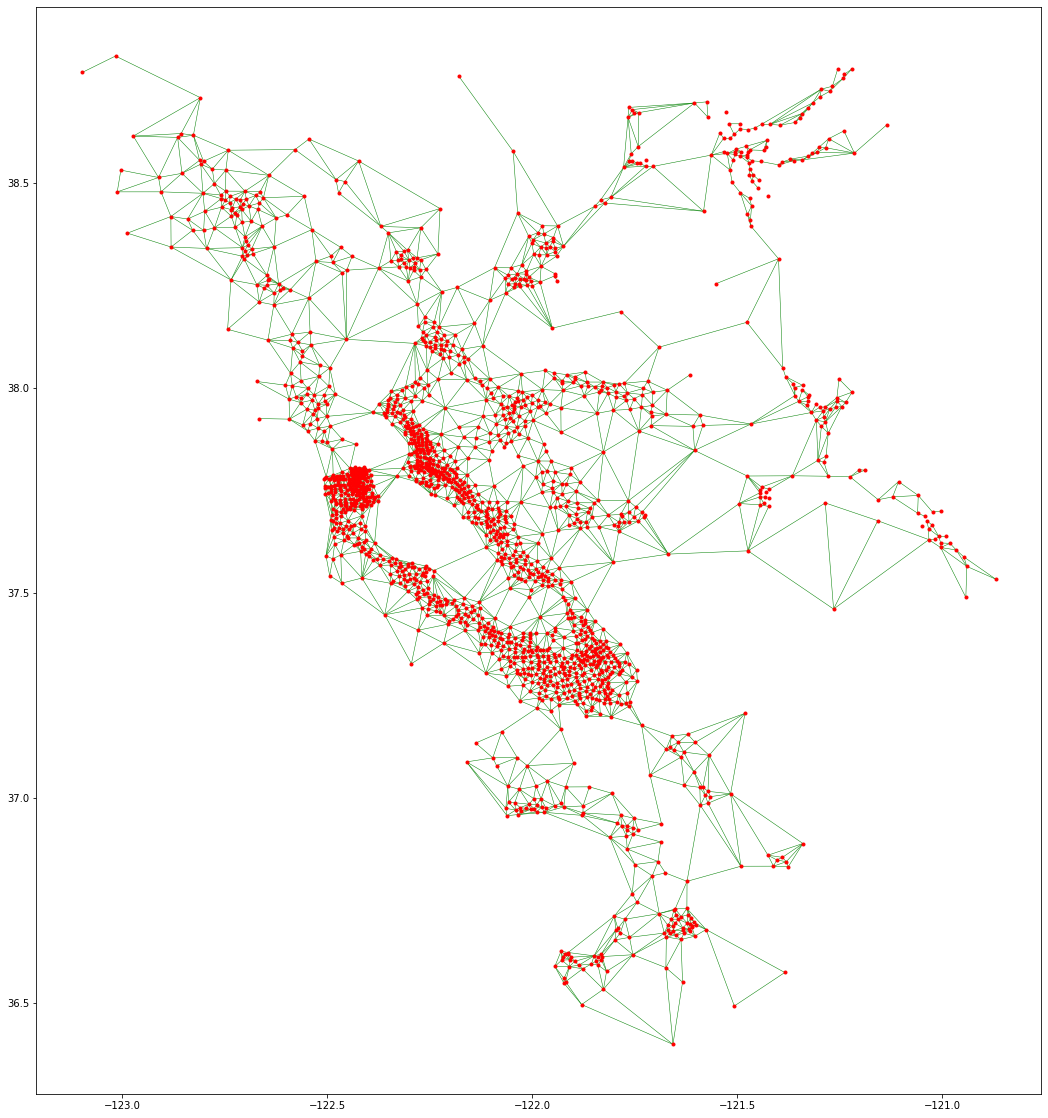

In [0]:
plt.figure(figsize=(30,20))
for e_id, e in enumerate(g_road.es):
#     if e_id not in edges_removed:
    scr_loc = np.array(gcc.vs[e.source]['location'])
    targ_loc = np.array(gcc.vs[e.target]['location'])
    loc = np.vstack((scr_loc, targ_loc))
#     print('asdf')
#     print(scr_loc)
#     print(targ_loc)
#     print(loc)
    plt.plot(loc[:,0], loc[:,1],'g', lw=0.5)
# triangulation = mpltri.Triangulation(points[:,0], points[:,1])
# plt.triplot(triangulation, lw=0.5)
plt.plot(points[:,0], points[:,1], 'ro', ms=3)
plt.axis('scaled')
plt.show()


In [0]:
#q15

In [0]:
mf_pruned = g_road.maxflow(Stanford_vid, UCSC_vid, capacity=g_road.es['capacity'])
print('max flow from Stanford to UCSC = {} cars/hour'.format(mf_pruned.value))
n_disjoint_paths_pruned = g_road.edge_disjoint_paths(Stanford_vid, UCSC_vid)
print('n_disjoint_paths =', n_disjoint_paths_pruned)

max flow from Stanford to UCSC = 14866.477294089276 cars/hour
n_disjoint_paths = 5


In [0]:
g_e = list(igraph.EdgeSeq(g_road))
print(len(g_e))

5249


In [0]:

g_vertices = list(igraph.VertexSeq(gcc))
for i in range(3):
    print(g_vertices[i])
g_edges = list(igraph.EdgeSeq(gcc))
for i in range(3):
    print(g_edges[i].source)
    print((tri.simplices))
    
print(np.unique(g_vertices))
print(g_vertices[15]['name'])
print(g_vertices[8]['name'])

igraph.Vertex(<igraph.Graph object at 0x7fdd821747c8>, 0, {'name': 1982, 'display_name': '100 Monte Verde Drive, Vacaville', 'location': [-122.00124636111111, 38.35243988888889]})
igraph.Vertex(<igraph.Graph object at 0x7fdd821747c8>, 1, {'name': 73, 'display_name': '2100 Fieldcrest Avenue, Fairfield', 'location': [-122.0521615625, 38.292827187499995]})
igraph.Vertex(<igraph.Graph object at 0x7fdd821747c8>, 2, {'name': 2213, 'display_name': '800 40th Street, Longfellow, Oakland', 'location': [-122.27357263157896, 37.83122173684211]})
0
[[ 693 1881 1857]
 [1883 1807 1424]
 [1206  693 1857]
 ...
 [ 417 1078  668]
 [1078 1371  668]
 [1078  498 1371]]
0
[[ 693 1881 1857]
 [1883 1807 1424]
 [1206  693 1857]
 ...
 [ 417 1078  668]
 [1078 1371  668]
 [1078  498 1371]]
0
[[ 693 1881 1857]
 [1883 1807 1424]
 [1206  693 1857]
 ...
 [ 417 1078  668]
 [1078 1371  668]
 [1078  498 1371]]
[igraph.Vertex(<igraph.Graph object at 0x7fdd821747c8>, 0, {'name': 1982, 'display_name': '100 Monte Verde Drive

In [0]:
# print(gcc.es[triangulation.edges[0]]['weight'])
print(gcc.vs[15])
print(gcc.vs[8])
print(len(g_vertices))
dist = np.linalg.norm(triangulation.edges, axis=1)
print(triangulation.edges)
print(dist)
# print(gcc.es[0:5])
print(gcc.vs[:6]['name'])
# g_vertices = list(igraph.VertexSeq(g))
# print(g_vertices.attributes)
print(np.unique(triangulation.edges))

igraph.Vertex(<igraph.Graph object at 0x7fdd821747c8>, 15, {'name': 1728, 'display_name': '800 Easton Avenue, San Bruno', 'location': [-122.40988516666668, 37.623597624999995]})
igraph.Vertex(<igraph.Graph object at 0x7fdd821747c8>, 8, {'name': 2231, 'display_name': '100 Garden Lane, Millbrae', 'location': [-122.39393493548386, 37.60722035483871]})
1898
[[  15    8]
 [  18    8]
 [  18   15]
 ...
 [1897 1451]
 [1897 1714]
 [1897 1883]]
[  17.           19.6977156    23.43074903 ... 2388.3069317  2556.63939577
 2672.88196522]
[1982, 73, 2213, 1523, 438, 433]
[   0    1    2 ... 1895 1896 1897]


In [0]:
for i in range(len(g_edges)):
    if (g_edges[i].source == 15 and g_edges[i].target == 8) or (g_edges[i].source == 8 and g_edges[i].target == 15):
        print(i)
        print(g_edges[i].source)
        print(g_edges[i].target)
        print(g_vertices[g_edges[i].source])
        print(g_vertices[g_edges[i].target])
        gcc.es[i]['capacity'] = 1234
print(gcc.es[4216]['capacity'])

4216
8
15
igraph.Vertex(<igraph.Graph object at 0x7fdd821747c8>, 8, {'name': 2231, 'display_name': '100 Garden Lane, Millbrae', 'location': [-122.39393493548386, 37.60722035483871]})
igraph.Vertex(<igraph.Graph object at 0x7fdd821747c8>, 15, {'name': 1728, 'display_name': '800 Easton Avenue, San Bruno', 'location': [-122.40988516666668, 37.623597624999995]})
1234
